In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_auc_score, roc_curve

### Function

In [22]:
# Define the objective for each model
def objective_logreg(trial):
    penalty = trial.suggest_categorical("penalty", ["l2", None])
    C = trial.suggest_float("C", 1e-3, 10.0, log=True)

    model = LogisticRegression(penalty=penalty, C=C, solver='lbfgs', max_iter=100)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

def objective_nb(trial):
    var_smoothing = trial.suggest_float("var_smoothing", 1e-11, 1e-7, log=True)
    model = GaussianNB(var_smoothing=var_smoothing)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

def objective_lda(trial):
    solver = trial.suggest_categorical("solver", ["svd", "lsqr", "eigen"])
    shrinkage = None
    if solver in ["lsqr", "eigen"]:
        shrinkage = trial.suggest_categorical("shrinkage", ["auto", 0.0, 0.1, 0.5, 1.0])
    model = LinearDiscriminantAnalysis(solver=solver, shrinkage=shrinkage)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# Run Optuna
def run_study(objective_func, model_name, n_trials=20):
    print(f"🔍 Optimizing {model_name}...")
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_func, n_trials=n_trials)
    print(f"✅ Best score for {model_name}: {study.best_value}")
    print(f"🏆 Best params: {study.best_params}\n")
    return study.best_params

In [23]:
def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix", cmap="Blues"):
    """
    Plots a labeled confusion matrix using seaborn heatmap.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: List of label names (optional)
    - title: Title of the plot
    - cmap: Color map for heatmap
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=labels, yticklabels=labels)
    
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

In [24]:
def plot_roc_curves(models_probs, y_true):
    """
    Plots ROC curves for multiple models.

    Parameters:
    - models_probs: A list of tuples like (model_name, y_proba), where y_proba is probability of class 1
    - y_true: True binary labels (0 or 1)
    """
    plt.figure(figsize=(7, 6))

    for model_name, y_proba in models_probs:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        auc_score = roc_auc_score(y_true, y_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Import data

In [25]:
X = np.load('X_final.npy')
y = np.load('y_final.npy')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Finetuning model

In [28]:
best_params_logreg = run_study(objective_logreg, "Logistic Regression")

[I 2025-05-05 16:41:43,212] A new study created in memory with name: no-name-4cfe7cab-3d95-41e0-910c-6320ef19254b


🔍 Optimizing Logistic Regression...


[I 2025-05-05 16:41:45,905] Trial 0 finished with value: 0.9700658910375033 and parameters: {'penalty': 'l2', 'C': 1.5053191183935941}. Best is trial 0 with value: 0.9700658910375033.
[I 2025-05-05 16:41:47,393] Trial 1 finished with value: 0.9754897378924977 and parameters: {'penalty': 'l2', 'C': 0.004278405693683487}. Best is trial 1 with value: 0.9754897378924977.
[I 2025-05-05 16:41:48,822] Trial 2 finished with value: 0.9753295443523933 and parameters: {'penalty': 'l2', 'C': 0.003856617184903679}. Best is trial 1 with value: 0.9754897378924977.
[I 2025-05-05 16:41:50,633] Trial 3 finished with value: 0.9743454736302377 and parameters: {'penalty': 'l2', 'C': 0.04667170621582858}. Best is trial 1 with value: 0.9754897378924977.
[I 2025-05-05 16:41:52,384] Trial 4 finished with value: 0.9730181299141534 and parameters: {'penalty': 'l2', 'C': 0.11398415775140684}. Best is trial 1 with value: 0.9754897378924977.
c:\Users\Dell V3400\AppData\Local\Programs\Python\Python312\Lib\site-packa

✅ Best score for Logistic Regression: 0.9757872579132335
🏆 Best params: {'penalty': 'l2', 'C': 0.012377773654182897}



In [29]:
best_params_nb = run_study(objective_nb, "Naive Bayes")

[I 2025-05-05 16:42:19,740] A new study created in memory with name: no-name-3464c017-3d3f-4c2c-a184-70bf750ba4dc


🔍 Optimizing Naive Bayes...


[I 2025-05-05 16:42:22,200] Trial 0 finished with value: 0.8071676494678695 and parameters: {'var_smoothing': 1.1311822414801389e-09}. Best is trial 0 with value: 0.8071676494678695.
[I 2025-05-05 16:42:24,117] Trial 1 finished with value: 0.8071676494678695 and parameters: {'var_smoothing': 2.3282360868690014e-09}. Best is trial 0 with value: 0.8071676494678695.
[I 2025-05-05 16:42:26,031] Trial 2 finished with value: 0.8071676494678695 and parameters: {'var_smoothing': 1.833939367981487e-10}. Best is trial 0 with value: 0.8071676494678695.
[I 2025-05-05 16:42:28,002] Trial 3 finished with value: 0.8071676494678695 and parameters: {'var_smoothing': 2.4356719419161736e-10}. Best is trial 0 with value: 0.8071676494678695.
[I 2025-05-05 16:42:29,884] Trial 4 finished with value: 0.8071676494678695 and parameters: {'var_smoothing': 8.273915617278119e-09}. Best is trial 0 with value: 0.8071676494678695.
[I 2025-05-05 16:42:31,782] Trial 5 finished with value: 0.8071676494678695 and paramet

✅ Best score for Naive Bayes: 0.8071676494678695
🏆 Best params: {'var_smoothing': 1.1311822414801389e-09}



In [30]:
best_params_lda = run_study(objective_lda, "LDA")

[I 2025-05-05 16:42:59,076] A new study created in memory with name: no-name-9306911b-7a76-423b-9b8d-2498e0cd2de6


🔍 Optimizing LDA...


[I 2025-05-05 16:43:04,474] Trial 0 finished with value: 0.9769315206043063 and parameters: {'solver': 'eigen', 'shrinkage': 0.1}. Best is trial 0 with value: 0.9769315206043063.
[I 2025-05-05 16:43:34,471] Trial 1 finished with value: 0.9769086394041478 and parameters: {'solver': 'svd'}. Best is trial 0 with value: 0.9769315206043063.
[I 2025-05-05 16:43:59,762] Trial 2 finished with value: 0.9769086394041478 and parameters: {'solver': 'svd'}. Best is trial 0 with value: 0.9769315206043063.
[I 2025-05-05 16:44:20,800] Trial 3 finished with value: 0.9769086394041478 and parameters: {'solver': 'svd'}. Best is trial 0 with value: 0.9769315206043063.
[I 2025-05-05 16:44:25,595] Trial 4 finished with value: 0.9728121504059234 and parameters: {'solver': 'eigen', 'shrinkage': 0.5}. Best is trial 0 with value: 0.9769315206043063.
[I 2025-05-05 16:44:29,718] Trial 5 finished with value: 0.9769315206043063 and parameters: {'solver': 'eigen', 'shrinkage': 0.1}. Best is trial 0 with value: 0.9769

✅ Best score for LDA: 0.9769315206043063
🏆 Best params: {'solver': 'eigen', 'shrinkage': 0.1}



### Training

In [33]:
lr = LogisticRegression(penalty='l2', C=0.012377773654182897, solver='liblinear')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [34]:
nb = GaussianNB(var_smoothing=1.1311822414801389e-09)
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [35]:
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.1)
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

### Results

In [36]:
print("Logistic Regression Report: \n", classification_report(y_test, y_pred_lr))
print("Naive Bayes Report: \n", classification_report(y_test, y_pred_nb))
print("LDA Report: \n", classification_report(y_test, y_pred_lda))

Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1704
           1       0.99      0.99      0.99      9220

    accuracy                           0.98     10924
   macro avg       0.96      0.95      0.96     10924
weighted avg       0.98      0.98      0.98     10924

Naive Bayes Report: 
               precision    recall  f1-score   support

           0       0.44      0.88      0.59      1704
           1       0.97      0.80      0.88      9220

    accuracy                           0.81     10924
   macro avg       0.71      0.84      0.73     10924
weighted avg       0.89      0.81      0.83     10924

LDA Report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1704
           1       0.98      0.99      0.99      9220

    accuracy                           0.98     10924
   macro avg       0.97      0.95      0.96     10924
weighted

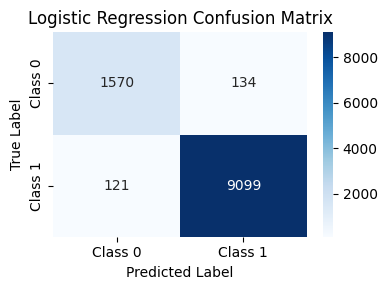

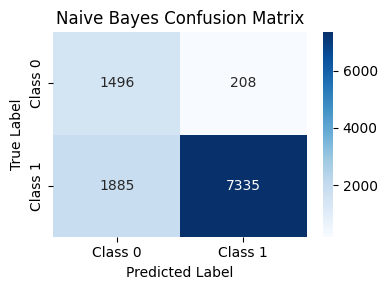

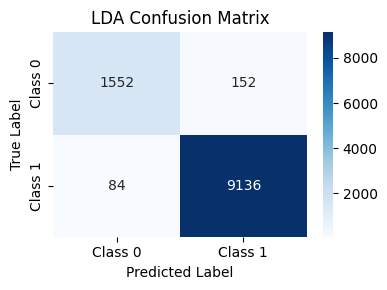

In [37]:
plot_confusion_matrix(y_test, y_pred_lr, labels=["Class 0", "Class 1"], title="Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nb, labels=["Class 0", "Class 1"], title="Naive Bayes Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_lda, labels=["Class 0", "Class 1"], title="LDA Confusion Matrix")

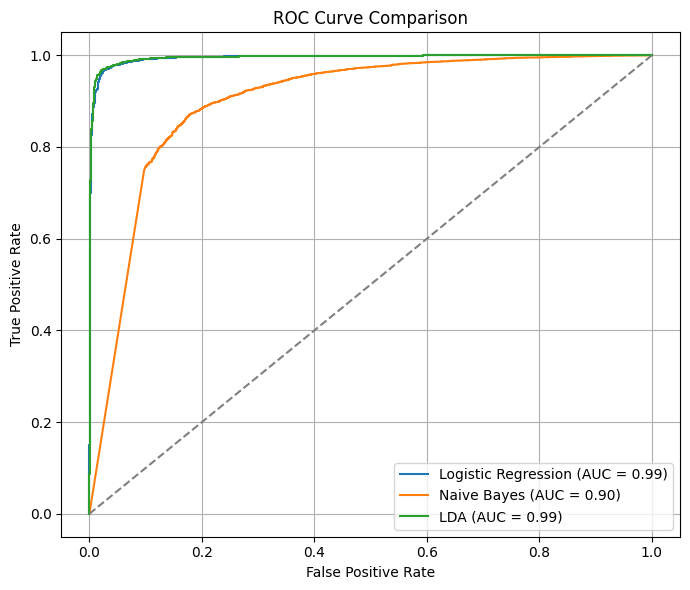

In [38]:
y_proba_lr = lr.predict_proba(X_test)[:, 1]
y_proba_nb = nb.predict_proba(X_test)[:, 1]
y_proba_lda = lda.predict_proba(X_test)[:, 1]
models_probs = [("Logistic Regression", y_proba_lr),
                ("Naive Bayes", y_proba_nb),
                ("LDA", y_proba_lda)]
plot_roc_curves(models_probs, y_test)